In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget --no-check-certificate https://drive.google.com/uc?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc -O loan.csv

--2024-02-16 15:29:50--  https://drive.google.com/uc?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc
Resolving drive.google.com (drive.google.com)... 209.85.147.139, 209.85.147.113, 209.85.147.102, ...
Connecting to drive.google.com (drive.google.com)|209.85.147.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc [following]
--2024-02-16 15:29:50--  https://drive.usercontent.google.com/download?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38011 (37K) [application/octet-stream]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  37.12K  --.-KB/s    in 0s      

2024-02-16 15:29:51 (107 MB/s) - ‘loan.c

In [3]:
data = pd.read_csv('loan.csv')
data.shape


(614, 13)

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
## Check if data types are correct
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
## remove any needless column (typically ID columns or columns with too much null values)
data=data.drop('Loan_ID',axis=1)

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
## Both incomes are skeewed
## significant portion of co applicant income  is 0

data.describe(include=['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [11]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

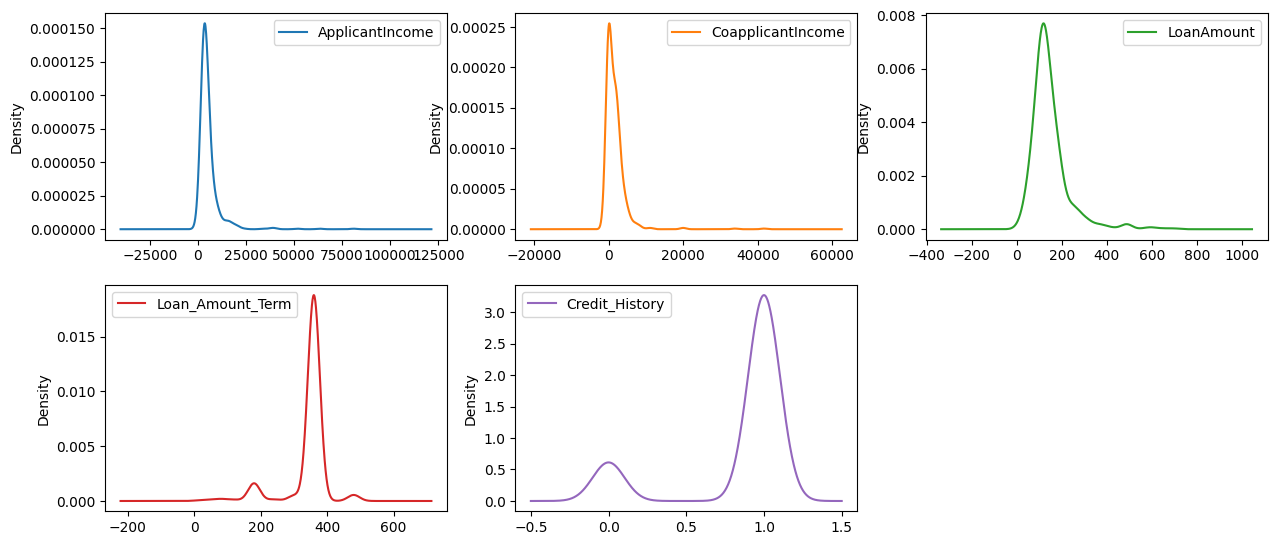

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,10]
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

In [13]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [14]:
data.kurt()

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

In [15]:
data['Loan_Status'].value_counts()
target = 'Loan_Status'

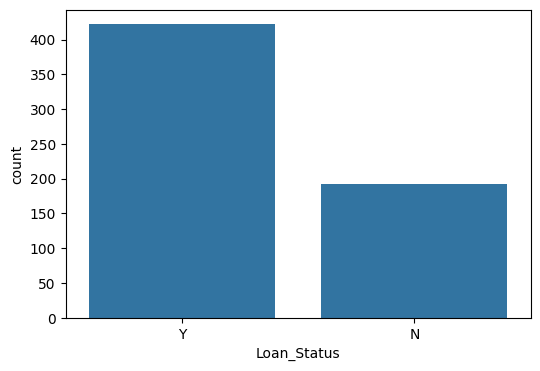

In [16]:
plt.rcParams["figure.figsize"] = [6,4]
sns.countplot(data=data, x='Loan_Status')
plt.show()

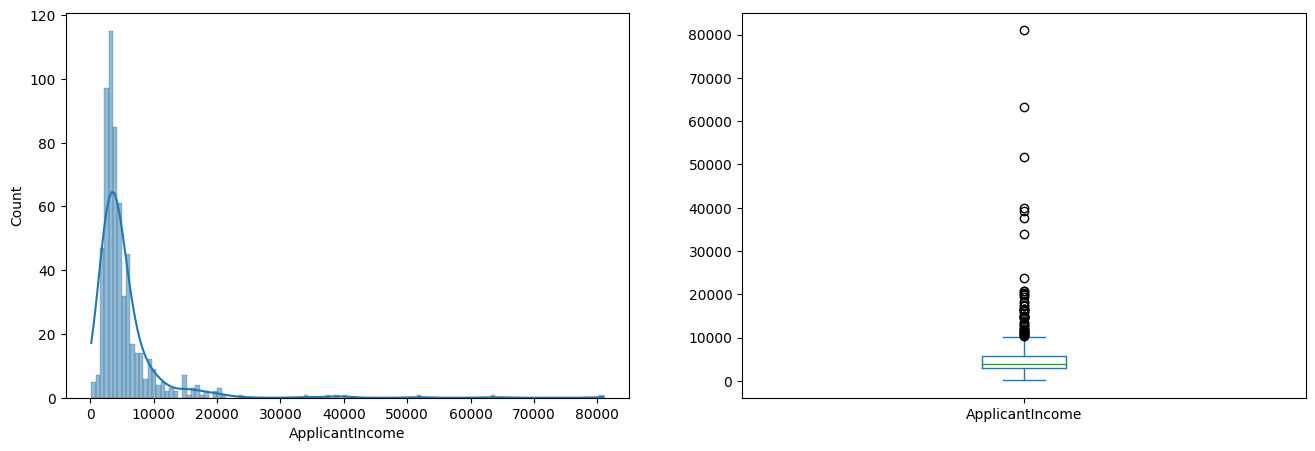

In [18]:
plt.subplot(121)
sns.histplot(data["ApplicantIncome"], kde=True)

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [19]:
data.groupby("Loan_Status")['ApplicantIncome'].mean()


Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [20]:
from scipy.stats import ttest_ind

a = data[data["Loan_Status"]=="Y"]["ApplicantIncome"]
b = data[data["Loan_Status"]=="N"]["ApplicantIncome"]

# H0: Income and Loan status are independent
# Ha: Dependent
ttest_ind(a, b)

TtestResult(statistic=-0.11650844828724542, pvalue=0.907287812130518, df=612.0)

In [21]:
## first create smaller groups/category from income.
## binning can give us better insights

bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low', 'Average', 'Medium', 'H1', 'H2', 'H3', 'H4', 'Very High']

data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium


In [22]:
pd.crosstab(data["Income_bin"],data["Loan_Status"])


Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
Medium,45,98
H1,20,34
H2,9,22
H3,13,27
H4,3,6
Very High,1,2


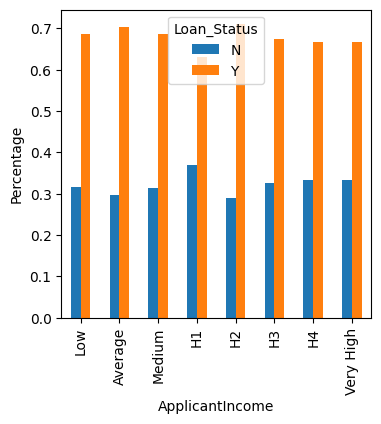

In [23]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"], normalize="index")
Income_bin.plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [24]:
from scipy.stats import chi2_contingency

val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values
print(val)

# H0: Loan status and Income are independent
chi2_contingency(val)

[[ 34  74]
 [ 67 159]
 [ 45  98]
 [ 20  34]
 [  9  22]
 [ 13  27]
 [  3   6]
 [  1   2]]


Chi2ContingencyResult(statistic=1.2420001711303135, pvalue=0.9899274842922701, dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

In [25]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]


In [26]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [27]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium,6091.0,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium,6000.0,High


<Axes: xlabel='TotalIncome_bin'>

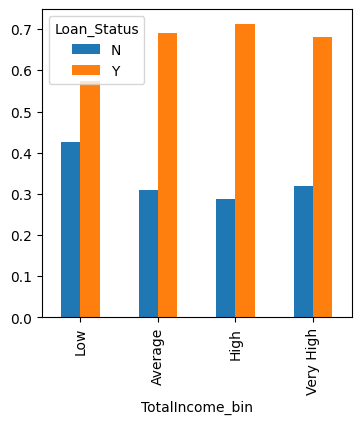

In [28]:
vals_n = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"], normalize="index")
vals_n.plot(kind="bar",figsize=(4,4))

In [29]:
vals = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])
vals

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


In [30]:
chi2_contingency(vals) # chi_stat, p-value, dof, expected


Chi2ContingencyResult(statistic=3.428480885250809, pvalue=0.3301570564076713, dof=3, expected_freq=array([[ 14.6970684 ,  32.3029316 ],
       [ 69.73289902, 153.26710098],
       [ 66.29315961, 145.70684039],
       [ 41.27687296,  90.72312704]]))

In [31]:
data.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium,6091.0,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average,2900.0,Low
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,Medium,4106.0,Average
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,H2,8312.0,Very High
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,H1,7583.0,High


In [34]:
data['EMI'] = (data['LoanAmount']/data['Loan_Amount_Term'])*1000

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium,5849.0,High,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium,6091.0,High,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Low,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,Average,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium,6000.0,High,391.666667


In [43]:
data['able_to_pay'] = (data["TotalIncome"]*0.4>data['EMI']).astype('int')
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,EMI,able_to_pay
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium,5849.0,High,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium,6091.0,High,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Low,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,Average,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium,6000.0,High,391.666667,1


<Axes: xlabel='able_to_pay', ylabel='count'>

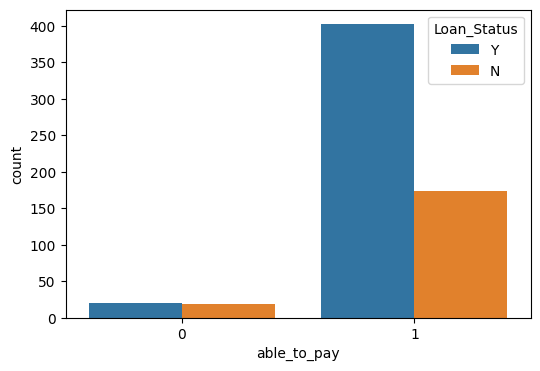

In [44]:
sns.countplot(x='able_to_pay', data = data, hue = 'Loan_Status')


In [45]:
vals = pd.crosstab(data['able_to_pay'], data['Loan_Status'])
vals

Loan_Status,N,Y
able_to_pay,,
0,19,20
1,173,402


In [46]:
chi2_contingency(pd.crosstab(data['able_to_pay'], data['Loan_Status']))


Chi2ContingencyResult(statistic=5.06370716479013, pvalue=0.024431922578328144, dof=1, expected_freq=array([[ 12.19543974,  26.80456026],
       [179.80456026, 395.19543974]]))

In [ ]:
5th percentile
95th percentile

df[df[val]>5th & f[val]>95th]